# Data preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
from scipy.stats import zscore

In [2]:
inva = pd.read_csv('Data/inva_total_statistics.csv', sep=';')
inva_children = pd.read_csv('Data/inva_children_statistics.csv', sep=';')
demos = pd.read_csv('Data/demo_total_statistics.csv', sep=';')
demos_children = pd.read_csv('Data/demo_children_statistics.csv', sep=';')
benefits = pd.read_csv('Data/inva_benefits_statistics.csv', sep=';')
inva

,Region,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,RK,563 086,609 780,626 740,627 163,637 217,651 924,662 544,680 025,695 253,695 131,696 825,711 786
1,ABAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24 272
2,AKM,26 298,28 193,28 470,28 003,28 221,28 637,28 821,29 200,29 059,28 798,29 073,28 948
3,AKT,19 667,21 451,22 181,22 256,22 909,24 040,25 008,25 962,27 044,27 401,27 694,28 618
4,ALMO,62 919,69 584,71 144,70 282,69 968,68 248,67 280,68 259,68 775,67 251,67 237,43 668
5,ATR,16 268,17 554,18 301,18 888,19 438,20 239,21 003,21 748,22 886,23 066,23 679,24 446
6,ZKO,23 547,25 019,25 408,24 753,24 201,24 036,23 684,24 023,24 401,24 272,24 213,24 351
7,ZHM,36 021,38 375,39 622,40 365,41 377,42 570,43 301,44 679,45 880,45 805,45 777,45 426
8,ZHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24 364
9,KRG,56 994,61 704,63 385,62 239,63 102,64 329,65 552,66 845,67 763,67 384,67 795,56 106


# Functions

In [3]:
def boxplot(df, title):
    figure(figsize=(20, 7), dpi=80)
    melted_df = pd.melt(df, id_vars=['Region'], var_name='Year', value_name='Value')
    melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')
    melted_df['Z_Score'] = melted_df.groupby('Region')['Value'].transform(zscore)
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.boxplot(x='Region', y='Z_Score', data=melted_df, ax=ax)
    plt.title(title)
    plt.show()

def colors_from_values(values, palette_name):
    normalized = (values - min(values)) / (max(values) - min(values))
    print(min(values), max(values))
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

def barplot(df, x, y, ylabel, xlabel):
    plt.figure(figsize=(12, 7))
    sns.barplot(data=df, x=x, y=y, palette=colors_from_values(df[y], 'Greens_d'))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

# EDA 1

### Population of disabled people (general)

11430 96783


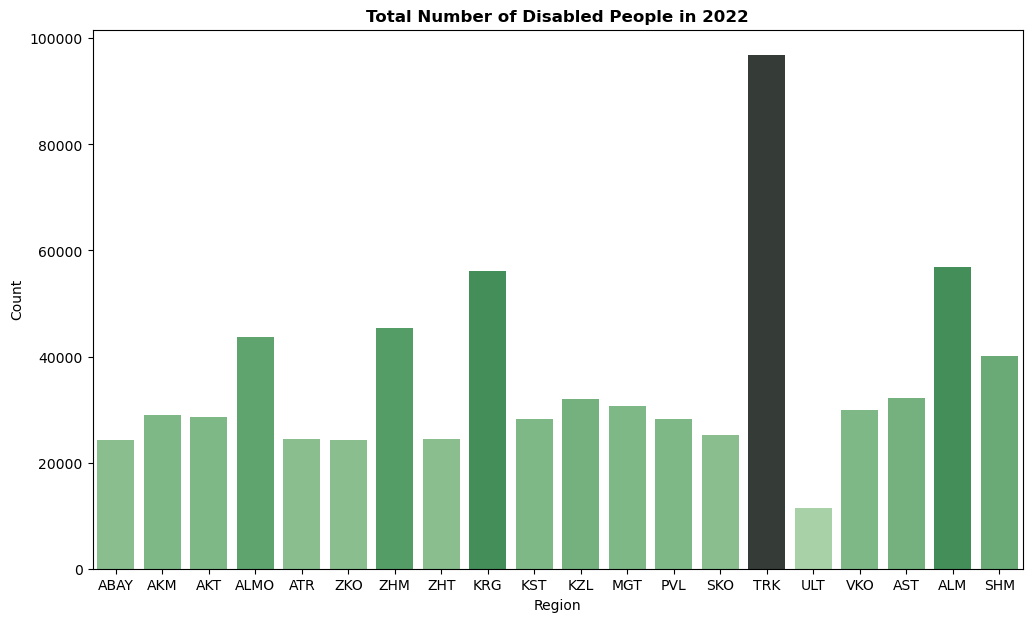

In [4]:
# for col in inva.columns[1:]:
#     inva[col] = pd.to_numeric(inva[col].str.replace(' ', ''), errors='coerce')

for year in range(2022, 2023):
    temp = inva[['Region', str(year)]].drop(index=inva.index[0], axis=0).dropna()
    barplot(temp, x='Region', y=str(year), ylabel='Count', xlabel='Region')
    plt.title(f'Total Number of Disabled People in {year}', fontweight="bold")

### Ratio of disabled people (general)

In [5]:
inva_ratio = inva.copy()

def ratio(inva, demos, inva_ratio):
    try:
        num_inva = inva.drop(['Region'], axis=1).fillna(0).copy()
        num_demos = demos.drop(['Region'], axis=1).fillna(0).copy()

        for col in demos.columns[1:]:
            num_demos[col] = pd.to_numeric(num_demos[col].str.replace(' ', ''), errors='coerce')
        for column in inva.columns[1:]:
            inva_ratio[column] = num_inva[column] / num_demos[column] * 100
    except:
        for column in inva.columns[1:]:
            inva_ratio[column] = inva[column] / demos[column] * 100

    return inva_ratio

inva_ratio = ratio(inva, demos, inva_ratio)

inva_ratio.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,21.000000
mean,3.374783,3.614888,3.668738,3.621369,3.628274,3.663935,3.582162,3.745562,3.785521,3.748726,3.722753,3.762646
std,0.626700,0.664116,0.669721,0.637495,0.646128,0.620066,1.225615,0.633780,0.639841,0.649685,0.699181,0.688062
min,2.094922,2.330562,2.398782,2.392012,2.376282,2.515059,0.000000,2.495592,2.551781,2.517876,2.256818,2.483733
25%,2.905774,3.195374,3.260475,3.326342,3.343373,3.404310,3.222308,3.413758,3.432556,3.336996,3.302001,3.443752
50%,3.442834,3.657086,3.706274,3.691096,3.718322,3.699080,3.689999,3.736650,3.760040,3.717954,3.697883,3.684320
75%,3.626328,3.893641,3.966195,3.966287,3.841087,3.846888,3.914053,3.987246,4.084076,4.042099,4.020328,4.095415
max,4.646594,4.987735,5.071934,4.991275,4.991344,4.949841,6.187295,4.881629,4.915591,4.893956,4.927184,5.173983


In [6]:
t_e = pd.DataFrame()
for year in range(2018, 2023):
    t_e[f'{year}'] = inva_ratio[[str(year)]].drop(index=inva_ratio.index[0], axis=0).dropna()
t_e['Region'] = inva_ratio['Region'].drop(index=inva_ratio.index[0], axis=0)
t_e['Dynamics'] = t_e['2022'] - t_e['2021'] 
t_e[t_e['Dynamics'] > 0][['Region', 'Dynamics']].sort_values(by=['Dynamics'])

,Region,Dynamics
9,KRG,0.016224
3,AKT,0.025070
13,PVL,0.028852
11,KZL,0.040529
12,MGT,0.050868
19,ALM,0.058217
17,VKO,0.074435
10,KST,0.121204
18,AST,0.226915


In [7]:
t_e[t_e['Dynamics'] < 0][['Region', 'Dynamics']].sort_values(by=['Dynamics'])

,Region,Dynamics
4,ALMO,-0.282169
2,AKM,-0.268146
7,ZHM,-0.263120
15,TRK,-0.140078
14,SKO,-0.139868
6,ZKO,-0.097742
20,SHM,-0.016293
5,ATR,-0.015055


In [8]:
t_e

,2018,2019,2020,2021,2022,Region,Dynamics
2,3.951596,3.934404,3.908868,3.952467,3.684320,AKM,-0.268146
3,3.026894,3.109803,3.107919,3.096609,3.121680,AKT,0.025070
4,3.383718,3.373084,3.271402,3.235711,2.953542,ALMO,-0.282169
5,3.503876,3.610970,3.574572,3.603506,3.588451,ATR,-0.015055
6,3.713402,3.740620,3.695246,3.661336,3.563594,ZKO,-0.097742
7,3.999130,4.076628,4.053185,4.018374,3.755255,ZHM,-0.263120
9,4.841956,4.915591,4.893956,4.927184,4.943408,KRG,0.016224
10,3.199233,3.228364,3.201777,3.249320,3.370524,KST,0.121204
11,3.798855,3.791222,3.804458,3.847957,3.888486,KZL,0.040529
12,3.868596,4.086559,4.088318,4.057140,4.108008,MGT,0.050868


2.4837328694438807 5.173982518004825


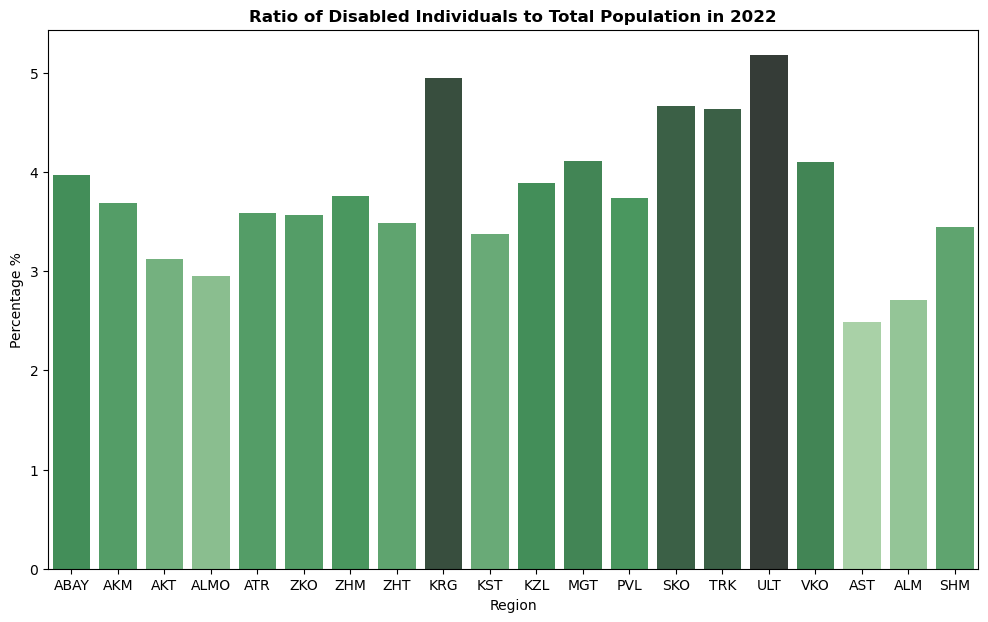

In [9]:
for year in range(2022, 2023):
    temp = inva_ratio[['Region', str(year)]].drop(index=inva_ratio.index[0], axis=0).dropna()
    barplot(temp, x='Region', y=str(year), ylabel='Percentage %', xlabel='Region')
    plt.title(f'Ratio of Disabled Individuals to Total Population in {year}', fontweight="bold")


### Population of disabled children: age [0; 17]

In [10]:
inva_children.describe()

,Region,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,21,17,17,17,17,17,17,17,18,18,18,18,21
unique,21,17,17,17,17,17,17,17,17,18,18,18,21
top,RK,61 196,65 844,69 111,72 574,75 712,79 662,83 462,2 796,91 573,94 660,98 254,104 260
freq,1,1,1,1,1,1,1,1,2,1,1,1,1


928 14829


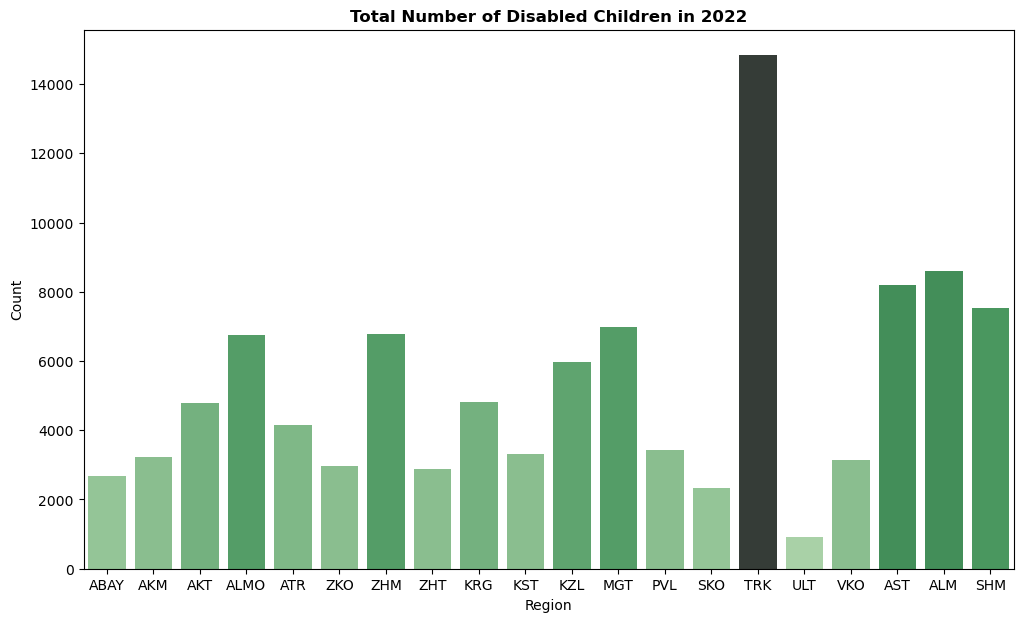

In [11]:
# for col in inva_children.columns[1:]:
#     inva_children[col] = pd.to_numeric(inva_children[col].str.replace(' ', ''), errors='coerce')

for year in range(2022, 2023):
    temp = inva_children[['Region', str(year)]].drop(index=inva_children.index[0], axis=0).dropna()
    barplot(temp, x='Region', y=str(year), xlabel='Region', ylabel='Count')
    plt.title(f'Total Number of Disabled Children in {year}', fontweight="bold")

### Error in children's demography

In [12]:
err = demos_children.drop(columns=['Region']).iloc[0] - demos_children.drop(columns=['Region']).iloc[1:].sum()
err

2011     9519.0
2012     9490.0
2013     8973.0
2014     8037.0
2015     7986.0
2016     7950.0
2017    10724.0
2018    10721.0
2019    10039.0
2020    11079.0
2021    11654.0
2022    15174.0
2023    15925.0
dtype: float64

In ratio:

In [13]:
temp_err = err/demos_children.drop(columns=['Region']).iloc[0]
temp_err

2011    0.001962
2012    0.001923
2013    0.001784
2014    0.001560
2015    0.001508
2016    0.001456
2017    0.001907
2018    0.001853
2019    0.001689
2020    0.001813
2021    0.001851
2022    0.002293
2023    0.002363
dtype: float64

### Ratio of disabled children

#### % of disabled children in each region

In [14]:
inva_children_ratio = inva_children.copy()
inva_children_ratio = ratio(inva_children, demos_children, inva_children_ratio)
inva_children_ratio.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,18.000000,18.000000,18.000000,18.000000,21.000000
mean,1.296933,1.339806,1.374818,1.406109,1.419433,1.448639,1.518038,1.505455,1.549413,1.565772,1.584322,1.576828
std,0.176496,0.128907,0.126198,0.124356,0.125359,0.143662,0.251675,0.176770,0.202535,0.220637,0.222717,0.251281
min,1.085281,1.101601,1.134186,1.161704,1.190696,1.263671,1.248697,1.225999,1.228106,1.187977,1.188127,1.192273
25%,1.191035,1.277471,1.320328,1.330934,1.357963,1.360524,1.391865,1.391756,1.433088,1.465562,1.486662,1.428342
50%,1.261373,1.334470,1.368986,1.404353,1.389988,1.401068,1.434653,1.458007,1.510687,1.509530,1.548322,1.575639
75%,1.345007,1.440466,1.487568,1.521376,1.545551,1.536320,1.527508,1.560246,1.597544,1.622497,1.647418,1.666521
max,1.795609,1.523103,1.521837,1.573914,1.614807,1.725541,2.306977,1.998383,2.187049,2.258691,2.267255,2.253586


1.1922726142110935 2.253585542525678


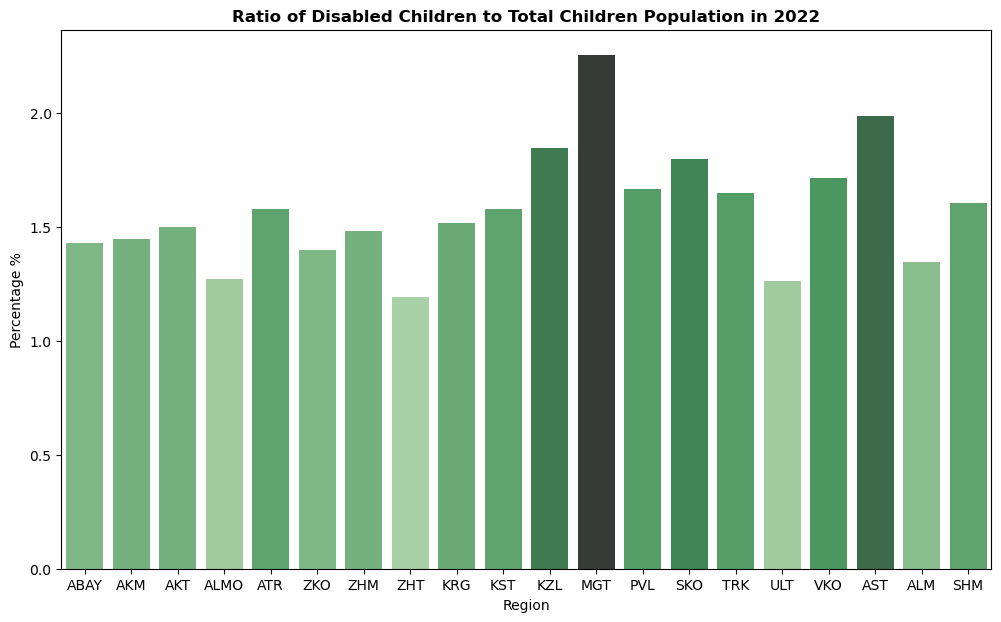

In [15]:
for year in range(2022, 2023):
    temp = inva_children_ratio[['Region', str(year)]].drop(index=inva_children.index[0], axis=0).dropna()
    barplot(temp, x='Region', y=str(year), xlabel='Region', ylabel='Percentage %')
    plt.title(f'Ratio of Disabled Children to Total Children Population in {year}', fontweight="bold")

# EDA 2

### Government benefits

In [16]:
benefits['2017'].describe()

count           6
unique          6
top       621 180
freq            1
Name: 2017, dtype: object

In [17]:
benefits['2018'].describe()

count          6
unique         6
top       86 446
freq           1
Name: 2018, dtype: object

86 49288


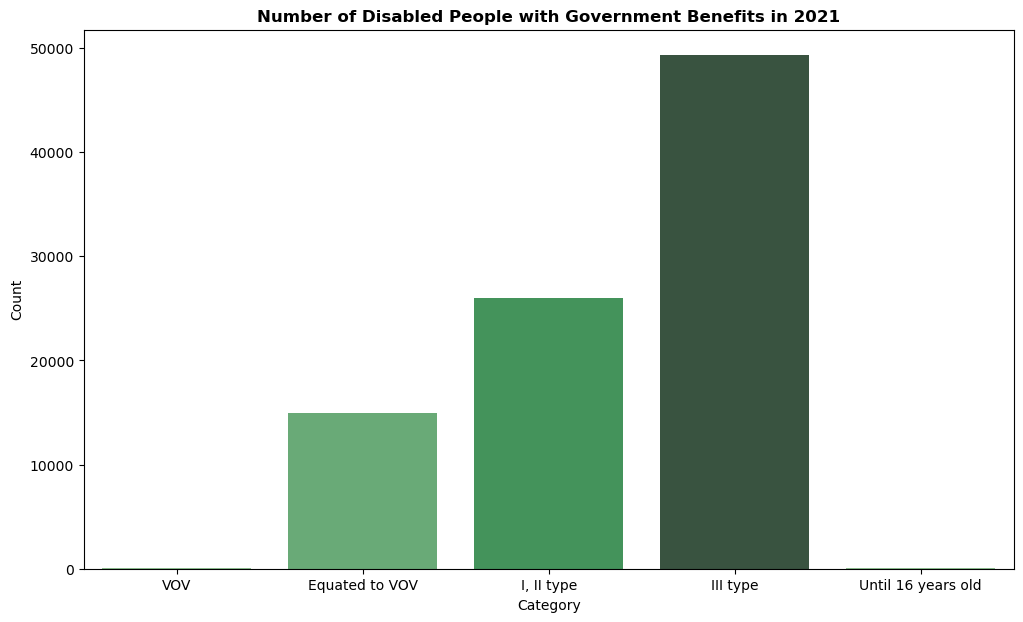

In [18]:
# for col in benefits.columns[1:]:
#     benefits[col] = pd.to_numeric(benefits[col].str.replace(' ', ''), errors='coerce')

for year in range(2021, 2022):
    temp = benefits.drop(index=inva.index[0], axis=0).dropna()
    barplot(temp, x='Type', y=str(year), ylabel='Count', xlabel = 'Category')
    plt.title(f'Number of Disabled People with Government Benefits in {year}', fontweight='bold')

In [25]:
# for col in benefits.columns[1:]:
#     benefits[col] = pd.to_numeric(benefits[col].str.replace(' ', ''), errors='coerce')


In [20]:
benefits

,Type,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Total,493432,487418,486147,487018,492191,497662,490777,482224,491890,...,551988,566942,581429,607183,621180,86446,89855,89571,90422,93314
1,VOV,21279,18481,15982,13659,11771,9916,8395,7028,5758,...,1872,1472,1100,857,638,443,312,194,110,75
2,Equated to VOV,13672,15351,16850,17847,18518,18550,18569,18352,18686,...,18571,18372,18032,17824,17340,16900,16274,15614,14954,14596
3,"I, II type",285763,280675,278904,279421,283065,282484,270655,262858,265034,...,282160,287489,291229,301622,305866,26353,26939,26411,25984,26855
4,III type,122552,125180,128933,131112,134083,141461,148435,151398,159228,...,192656,198947,206012,216483,223241,42561,46133,47148,49288,51725
5,Until 16 years old,50166,47731,45478,44979,44754,45251,44723,42588,43184,...,56729,60662,65056,70397,74095,189,197,204,86,63


In [21]:
benefits['2017'].describe()

count         6.000000
mean     207060.000000
std      235713.061372
min         638.000000
25%       31528.750000
50%      148668.000000
75%      285209.750000
max      621180.000000
Name: 2017, dtype: float64

### % of disabled people who get benefits from government

In [22]:
benefits_ratio = benefits.loc[0, '2011':'2022'].astype('float') / inva.drop(columns = ['Region']).loc[0, '2011':'2022'].astype('float') * 100

<Figure size 1200x900 with 0 Axes>

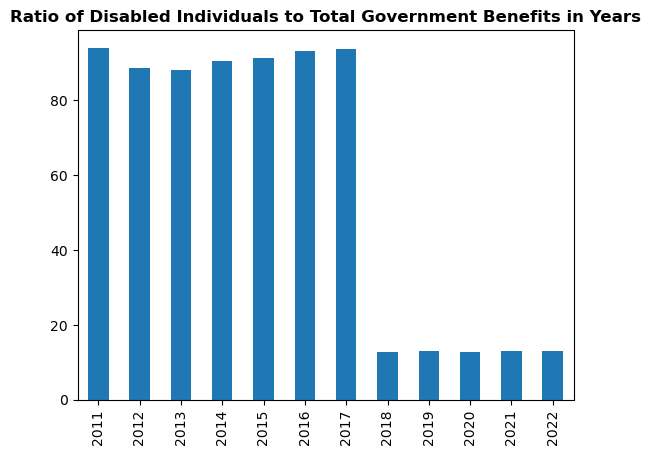

<Figure size 1200x900 with 0 Axes>

In [23]:
benefits_ratio.plot.bar()
plt.title('Ratio of Disabled Individuals to Total Government Benefits in Years', fontweight='bold')
plt.figure(figsize=(12,9))

<Figure size 1200x900 with 0 Axes>

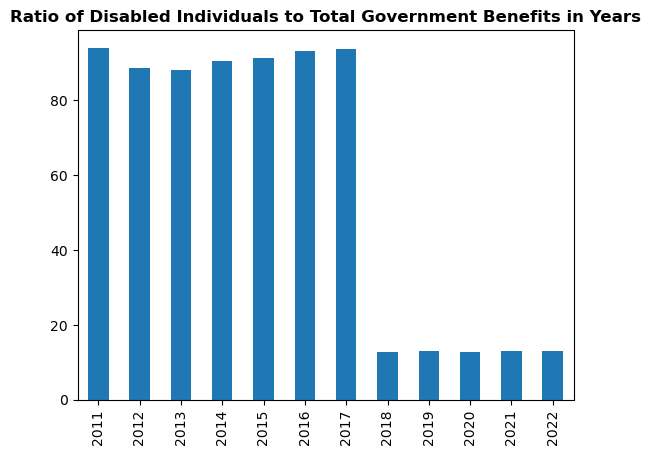

<Figure size 1200x900 with 0 Axes>

In [24]:
benefits_ratio.plot.bar()
plt.title('Ratio of Disabled Individuals to Total Government Benefits in Years', fontweight='bold')
plt.figure(figsize=(12,9))